# Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Decision Tree

**Decision Tree** is a **supervised learning algorithm** used for both **classification** and **regression**.  
It splits the data into smaller subsets based on feature values, creating a tree-like model of decisions.

### 1. Core Idea

A Decision Tree recursively partitions the feature space into regions that are as **pure** as possible  
(i.e., the samples within each leaf node mostly belong to the same class).

Each internal node tests a feature $x_j$ using a threshold $t$:

$$
x_j < t
\quad \Rightarrow \quad
\text{go left}
\qquad
x_j \geq t
\quad \Rightarrow \quad
\text{go right}
$$

The process continues until stopping criteria are met (e.g., maximum depth, minimum samples per leaf).

### 2. Impurity Measures

To choose the best split, the algorithm evaluates how well each feature separates the classes  
using an **impurity measure** such as **Entropy**, **Gini index**, or **Misclassification error**.

#### (a) Entropy

$$
H(S) = - \sum_{k=1}^{K} p_k \log_2 p_k
$$

where $p_k$ — proportion of samples belonging to class $k$ in subset $S$.

#### (b) Gini Index

$$
G(S) = 1 - \sum_{k=1}^{K} p_k^2
$$

#### (c) Misclassification Error

$$
E(S) = 1 - \max_{k}(p_k)
$$

### 3. Information Gain

When splitting a node $S$ into subsets $S_L$ and $S_R$,  
the **information gain** (for classification) is computed as:

$$
IG(S, t) = H(S) - \frac{|S_L|}{|S|}H(S_L) - \frac{|S_R|}{|S|}H(S_R)
$$

A higher $IG(S, t)$ means a better (more informative) split.

For regression, impurity is measured using **variance** or **mean squared error (MSE)**:

$$
MSE(S) = \frac{1}{|S|} \sum_{i \in S} (y_i - \bar{y}_S)^2
$$

and the algorithm minimizes the weighted average of child node errors.

### 4. Stopping Criteria

The recursive splitting stops when any of the following conditions is met:

* Maximum depth is reached  
* Minimum number of samples per leaf is reached  
* Information gain (or variance reduction) is below a threshold  
* All samples in the node belong to one class

### 5. Prediction

**Classification:**

$$
\hat{y} = \arg\max_{k} \; p_k
$$

**Regression:**

$$
\hat{y} = \frac{1}{|S_{\text{leaf}}|} \sum_{i \in S_{\text{leaf}}} y_i
$$

### Summary

Decision Trees are **intuitive**, **interpretable**, and can model **nonlinear relationships**.  
However, they are prone to **overfitting** — hence, ensemble methods like **Random Forest** and **Gradient Boosting** are often used to improve their stability and accuracy.

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [4]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 100.0%
Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



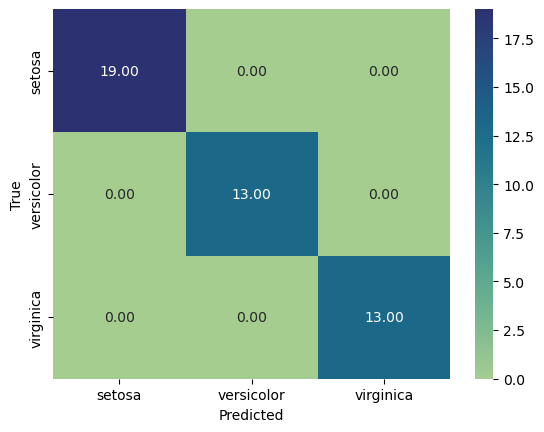

In [5]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt=".2f",
    cmap="crest",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [6]:
print(export_text(model, feature_names=load_iris().feature_names))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.60
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



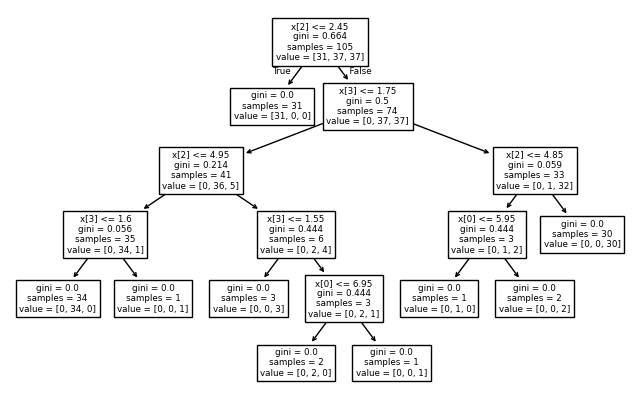

In [7]:
plt.figure(figsize=(8, 5))
plot_tree(model)
plt.show()

## Decision Tree Classifier on the Exoplanet Classification Dataset

[Exoplanet Classification Dataset on Kaggle](https://www.kaggle.com/datasets/datatalesbyagos/exoplanet-classification-dataset)

In [8]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [9]:
df = pd.read_csv("../data/ML_ready.csv")
df.head()

,PC1,PC2,PC3,label,ra,dec,j_mag,h_mag,k_mag,kep_mag,planet_radius,orbital_period,star_teff,star_logg,star_radius,star_mass,lc_time0
0,-0.329993,-0.469118,-0.051703,2,297.00482,48.134129,14.254,13.900,13.826,15.436,14.60,19.899140,5853.0,4.544,0.868,0.961,175.850252
1,0.093289,-0.453369,0.408759,2,285.53461,48.285210,14.326,13.911,13.809,15.597,33.46,1.736952,5805.0,4.564,0.791,0.836,170.307565
2,-0.469821,-0.455314,0.015327,0,288.75488,48.226200,14.366,14.064,13.952,15.509,2.75,2.525592,6031.0,4.438,1.046,1.095,171.595550
3,-0.296522,0.062012,0.022569,0,296.28613,48.224670,14.528,14.113,14.132,15.714,3.90,11.094321,6046.0,4.486,0.972,1.053,171.201160
4,-0.399275,-0.189558,0.008973,0,296.28613,48.224670,14.528,14.113,14.132,15.714,2.77,4.134435,6046.0,4.486,0.972,1.053,172.979370


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19761 entries, 0 to 19760
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             19761 non-null  float64
 1   PC2             19761 non-null  float64
 2   PC3             19761 non-null  float64
 3   label           19761 non-null  int64  
 4   ra              19761 non-null  float64
 5   dec             19761 non-null  float64
 6   j_mag           19761 non-null  float64
 7   h_mag           19761 non-null  float64
 8   k_mag           19761 non-null  float64
 9   kep_mag         19761 non-null  float64
 10  planet_radius   19761 non-null  float64
 11  orbital_period  19761 non-null  float64
 12  star_teff       19761 non-null  float64
 13  star_logg       19761 non-null  float64
 14  star_radius     19761 non-null  float64
 15  star_mass       19761 non-null  float64
 16  lc_time0        19761 non-null  float64
dtypes: float64(16), int64(1)
memory

In [11]:
df["label"].value_counts()

label
1    7413
0    6311
2    6015
3      22
Name: count, dtype: int64

In [12]:
df = df[df["label"] != 3]
df["label"].value_counts()

label
1    7413
0    6311
2    6015
Name: count, dtype: int64

In [13]:
y = df.pop("label").to_numpy()
X = df.to_numpy()

# selector = SelectKBest(mutual_info_classif, k=10)
# X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

(19739, 16)

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.1f}%")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 69.2%
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1266
           1       0.67      0.66      0.67      1477
           2       0.69      0.68      0.69      1205

    accuracy                           0.69      3948
   macro avg       0.69      0.69      0.69      3948
weighted avg       0.69      0.69      0.69      3948



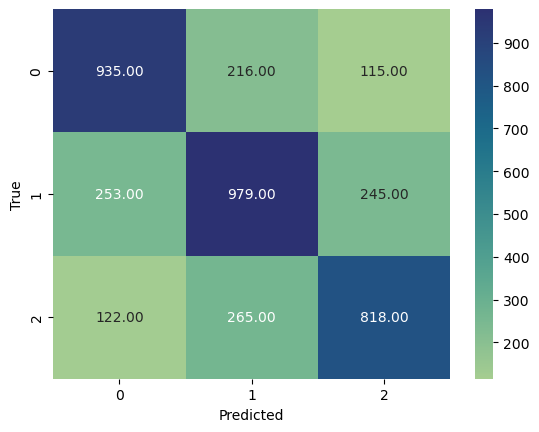

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", cmap="crest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
print(export_text(model))

|--- feature_9 <= 21.31
|   |--- feature_15 <= 2458181.38
|   |   |--- feature_10 <= 1.89
|   |   |   |--- feature_4 <= 12.08
|   |   |   |   |--- feature_7 <= 10.63
|   |   |   |   |   |--- feature_13 <= 1.22
|   |   |   |   |   |   |--- feature_13 <= 0.60
|   |   |   |   |   |   |   |--- feature_3 <= 288.53
|   |   |   |   |   |   |   |   |--- feature_5 <= 11.43
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 2457583.12
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_15 >  2457583.12
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_5 >  11.43
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  288.53
|   |   |   |   |   |   |   |   |--- feature_1